In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

In [2]:
plt.rcParams['figure.figsize'] = 10, 12

In [3]:
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

## Reading the Datasets

In [20]:
# Reading the datasets
df= pd.read_csv('state_level_latest.csv')
df_india = df.copy()
df.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,2025409,1377384,41638,605933,06-08-20 23:46,454,TT,0,0,0,NaN
1,Maharashtra,479779,316375,16792,146305,06-08-20 20:42,307,MH,0,0,0,307 cases are marked as non-covid deaths in MH...
2,Tamil Nadu,279144,221087,4571,53486,06-08-20 19:44,0,TN,0,0,0,[July 22]: 444 backdated deceased entries adde...
3,Delhi,141531,127124,4059,10348,06-08-20 18:39,0,DL,0,0,0,[July 14]: Value for the total tests conducted...
4,Karnataka,158254,80281,2897,75067,06-08-20 21:19,9,KA,0,0,0,NaN


In [35]:
# Coordinates of India States and Union Territories
India_coord = pd.read_csv('State Coordinates.csv')
India_coord.head()

,Name of State / UT,Latitude,Longitude,Unnamed: 3
0,Andaman and Nicobar Islands,11.667026,92.735983,NaN
1,Andhra Pradesh,14.750429,78.570026,NaN
2,Arunachal Pradesh,27.100399,93.616601,NaN
3,Assam,26.749981,94.216667,NaN
4,Bihar,25.785414,87.479973,NaN


In [36]:
India_coord.rename(columns={'Name of State / UT': 'State'}, inplace=True)
India_coord.drop(['Unnamed: 3'], axis=1, inplace=True)
India_coord.head()

,State,Latitude,Longitude
0,Andaman and Nicobar Islands,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [14]:
dbd_India = pd.read_csv('per_day_cases.csv')

## Analyzing COVID19 Cases in India

In [21]:
#cleaning dataseet
df.drop(['Last_Updated_Time',	'Migrated_Other',	'State_code',	'Delta_Confirmed',	'Delta_Recovered',	'Delta_Deaths',	'State_Notes'], axis=1, inplace=True)
df.head()

,State,Confirmed,Recovered,Deaths,Active
0,Total,2025409,1377384,41638,605933
1,Maharashtra,479779,316375,16792,146305
2,Tamil Nadu,279144,221087,4571,53486
3,Delhi,141531,127124,4059,10348
4,Karnataka,158254,80281,2897,75067


In [22]:
total_cases = df['Confirmed'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (6th August, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across India till date (6th August, 2020): 4050818


In [17]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,State,Confirmed,Recovered,Deaths,Active
0,Total,2025409,1377384,41638,605933
1,Maharashtra,479779,316375,16792,146305
2,Tamil Nadu,279144,221087,4571,53486
3,Delhi,141531,127124,4059,10348
4,Karnataka,158254,80281,2897,75067
5,Andhra Pradesh,196789,112870,1753,82166
6,Uttar Pradesh,108974,63402,1918,43654
7,Gujarat,67811,50524,2579,14708
8,West Bengal,86754,61023,1902,23829
9,Telangana,73050,52103,589,20358


In [23]:
# number of active cases in india - statewise
total_active = df['Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)

Total number of active COVID 2019 cases across India: 1211866


In [27]:
Tot_Cases = df.groupby('State')['Active'].sum().sort_values(ascending = False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

,Active
State,
Total,605933
Maharashtra,146305
Andhra Pradesh,82166
Karnataka,75067
Tamil Nadu,53486
Uttar Pradesh,43654
Bihar,23939
West Bengal,23829
Telangana,20358


## Visualizing the spread geographically

In [46]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord, df, on = 'State')
map = folium.Map(location = [20, 70], zoom_start = 5, tiles = 'Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State']):
    folium.CircleMarker([lat, lon], radius = value*0.0001, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## Visualisation: Confirmed vs Recovered

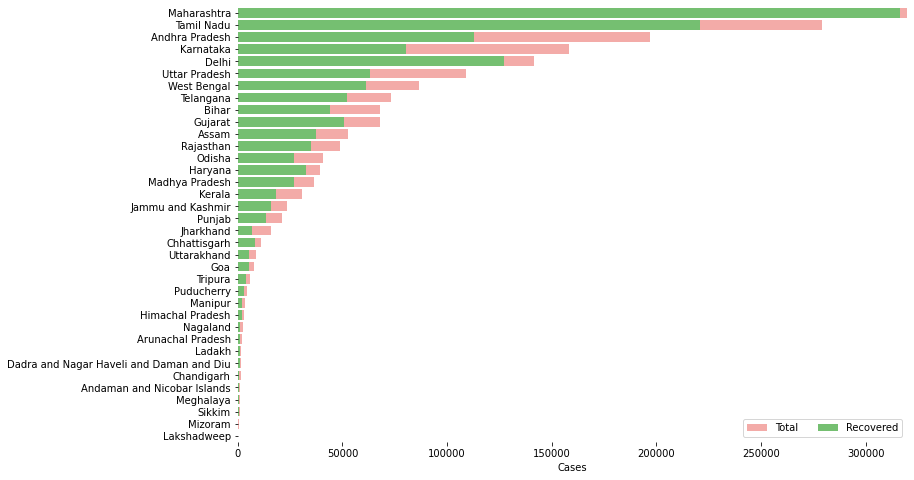

In [50]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['State','Confirmed', 'Recovered', 'Deaths']]
data.sort_values('Confirmed', ascending = False, inplace = True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State", data = data, label = "Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="State", data = data, label="Recovered", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 320000), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## How the Coronavirus cases are rising?

In [51]:
import plotly
plotly.io.renderers.default = 'colab'

In [ ]:
dbd_India = pd.read_csv('per_day_cases.csv')

In [52]:
dbd_India.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
0,30 January,1,1,0,0,0,0
1,31 January,0,1,0,0,0,0
2,01 February,0,1,0,0,0,0
3,02 February,1,2,0,0,0,0
4,03 February,1,3,0,0,0,0


In [53]:
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Confirmed'], mode='lines+markers', name='Total Confirmed'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)', plot_bgcolor = 'rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Daily Confirmed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis', plot_bgcolor = 'rgb(230, 230, 230)')

fig.show()

# Comparing the trend in India to the World


In [54]:
dbd_World = pd.read_csv('day_wise.csv')
dbd_World.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [59]:
#changing the date format
dbd_World['Date'] = pd.to_datetime(dbd_World.Date)
dbd_World['Date'] = dbd_World['Date'].dt.strftime('%d %B')
dbd_World.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22 January,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23 January,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24 January,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25 January,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26 January,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [62]:
# import plotly.express as px
# Comparing the growth of cases in India to the World
fig = px.bar(dbd_India, x="Date", y="Total Confirmed", color = 'Total Confirmed', orientation='v', height=900,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


fig = px.bar(dbd_World, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in the World', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()


## Comparison between the rise of cases in India and the USA

In [73]:
dbd_USA = pd.read_csv('us_covid19_daily.csv')
dbd_USA['date'] = pd.to_datetime(dbd_USA.date, format='%Y%m%d')
dbd_USA['date'] = dbd_USA['date'].dt.strftime('%d %B')
#dbd_USA.dropna(axis = 0, inplace = True)
dbd_USA.head()

,date,positive,recovered,death
0,29 February,18,NaN,5
1,01 March,50,NaN,8
2,02 March,94,NaN,11
3,03 March,142,NaN,14
4,04 March,281,NaN,16


In [68]:
dbd_World.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,22 January,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,23 January,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,24 January,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,25 January,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,26 January,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


In [74]:
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("India","USA", "World"))

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Confirmed'],
                    marker = dict(color=dbd_India['Total Confirmed'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_USA['date'], y=dbd_USA['positive'],
                    marker = dict(color=dbd_USA['positive'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_World['Date'], y=dbd_World['Confirmed'],
                    marker = dict(color = dbd_World['Confirmed'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [76]:
df = pd.read_csv('covid_19_data.csv',parse_dates=['ObservationDate'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df.drop(['Last Update',	'SNo'], axis=1, inplace=True)

df_confirmed = pd.read_csv("time_series_covid_19_confirmed.csv")
df_recovered = pd.read_csv("time_series_covid_19_recovered.csv")
df_deaths = pd.read_csv("time_series_covid_19_deaths.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [83]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Hong Kong,Hong Kong,0.0,0.0,0.0
1,2020-01-22,Macau,Macau,1.0,0.0,0.0
2,2020-01-22,Mainland China,Anhui,1.0,0.0,0.0
3,2020-01-22,Mainland China,Beijing,14.0,0.0,0.0
4,2020-01-22,Mainland China,Chongqing,6.0,0.0,0.0


In [84]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-30,1.0,0.0,0.0
1,2020-01-31,1.0,0.0,0.0
2,2020-02-01,1.0,0.0,0.0
3,2020-02-02,2.0,0.0,0.0
4,2020-02-03,3.0,0.0,0.0
...,...,...,...,...
233,2020-09-19,5308014.0,85619.0,4208431.0
234,2020-09-20,5400619.0,86752.0,4303043.0
235,2020-09-21,5487580.0,87882.0,4396399.0
236,2020-09-22,5562663.0,88935.0,4497867.0


In [85]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Confirmed,Deaths,Recovered
Date,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


## Visualizing: Worldwide COVID-19 cases  

In [86]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [87]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

# Predicting Total Number of Cases Worldwide


In [88]:
from fbprophet import Prophet

In [89]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [90]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


## Forecasting COVID-19 Cases Worldwide with Prophet for 1 week in future (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [91]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
248,2020-09-26
249,2020-09-27
250,2020-09-28
251,2020-09-29
252,2020-09-30


In [92]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
248,2020-09-26,3.241260e+07,3.233298e+07,3.249502e+07
249,2020-09-27,3.265962e+07,3.257718e+07,3.273693e+07
250,2020-09-28,3.291001e+07,3.282133e+07,3.300015e+07
251,2020-09-29,3.317134e+07,3.305149e+07,3.327768e+07
252,2020-09-30,3.344034e+07,3.330365e+07,3.356140e+07


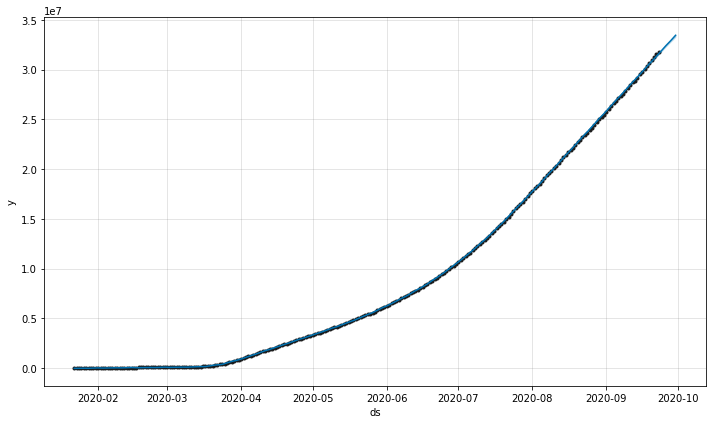

In [93]:
confirmed_forecast_plot = m.plot(forecast)

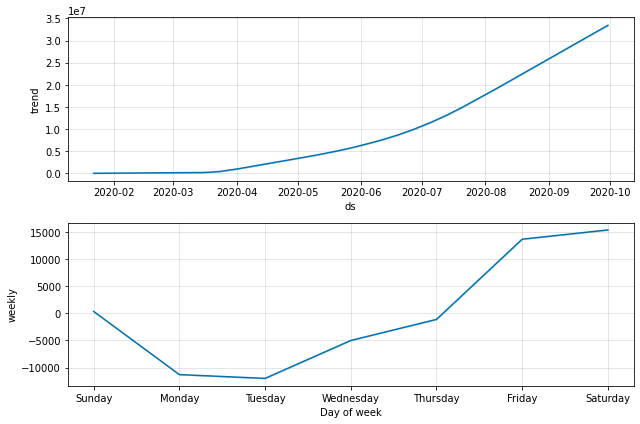

In [94]:
confirmed_forecast_plot =m.plot_components(forecast)

## Predicting Worldwide Recovered Cases with Prophet (Base model)

In [100]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [101]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
248,2020-09-26
249,2020-09-27
250,2020-09-28
251,2020-09-29
252,2020-09-30


In [102]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
248,2020-09-26,2.241481e+07,2.236811e+07,2.246070e+07
249,2020-09-27,2.261581e+07,2.256189e+07,2.266851e+07
250,2020-09-28,2.282627e+07,2.276734e+07,2.289375e+07
251,2020-09-29,2.304463e+07,2.297203e+07,2.312305e+07
252,2020-09-30,2.326678e+07,2.317230e+07,2.335647e+07


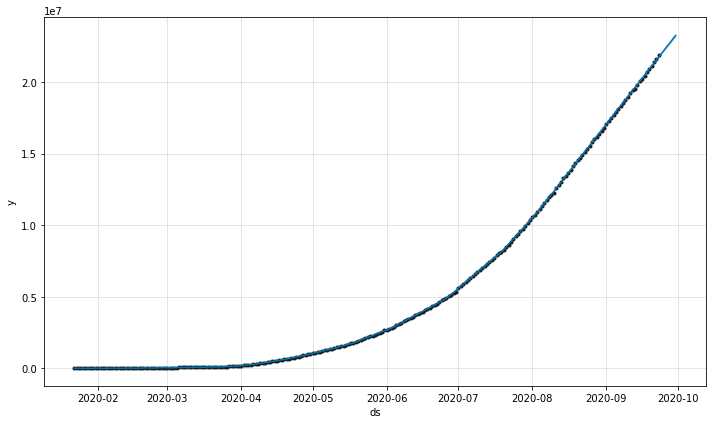

In [103]:
recovered_forecast_plot = m.plot(forecast)

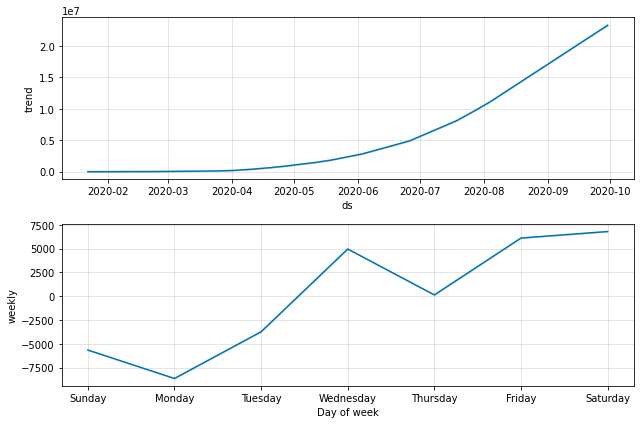

In [104]:
recovered_forecast_plot = m.plot_components(forecast)


#**Data Sources:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset
- https://www.kaggle.com/sudalairajkumar/covid19-in-usa?select=us_covid19_daily.csv
- https://www.kaggle.com/imdevskp/covid19-corona-virus-india-dataset

The above analysis was done on 25th August

